In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

### Reading the Data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Cleaning

I will take the following steps to clean the data
- Correcting data types
- Remove any unnecessary columns or values
- Handle missing values
- Remove outliers

### Correcting data types

Renaming column names for ease of analysis

In [5]:
rename_columns = ['age','sex','chest_pain_type','blood_pressure','cholesterol','blood_sugar','resting_ECG','max_heart_rate','exercise_induced_angina','old_peak','st_slope','heart_disease']

df.columns = rename_columns
df.head()

,age,sex,chest_pain_type,blood_pressure,cholesterol,blood_sugar,resting_ECG,max_heart_rate,exercise_induced_angina,old_peak,st_slope,heart_disease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      918 non-null    int64  
 1   sex                      918 non-null    object 
 2   chest_pain_type          918 non-null    object 
 3   blood_pressure           918 non-null    int64  
 4   cholesterol              918 non-null    int64  
 5   blood_sugar              918 non-null    int64  
 6   resting_ECG              918 non-null    object 
 7   max_heart_rate           918 non-null    int64  
 8   exercise_induced_angina  918 non-null    object 
 9   old_peak                 918 non-null    float64
 10  st_slope                 918 non-null    object 
 11  heart_disease            918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
categorical_features = ['sex','chest_pain_type','blood_sugar','resting_ECG','exercise_induced_angina','st_slope']

df[categorical_features] = df[categorical_features].astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      918 non-null    int64  
 1   sex                      918 non-null    object 
 2   chest_pain_type          918 non-null    object 
 3   blood_pressure           918 non-null    int64  
 4   cholesterol              918 non-null    int64  
 5   blood_sugar              918 non-null    object 
 6   resting_ECG              918 non-null    object 
 7   max_heart_rate           918 non-null    int64  
 8   exercise_induced_angina  918 non-null    object 
 9   old_peak                 918 non-null    float64
 10  st_slope                 918 non-null    object 
 11  heart_disease            918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


### Remove unnecessary columns or values

All the columns appear to be important and are useful so no columns will be removed

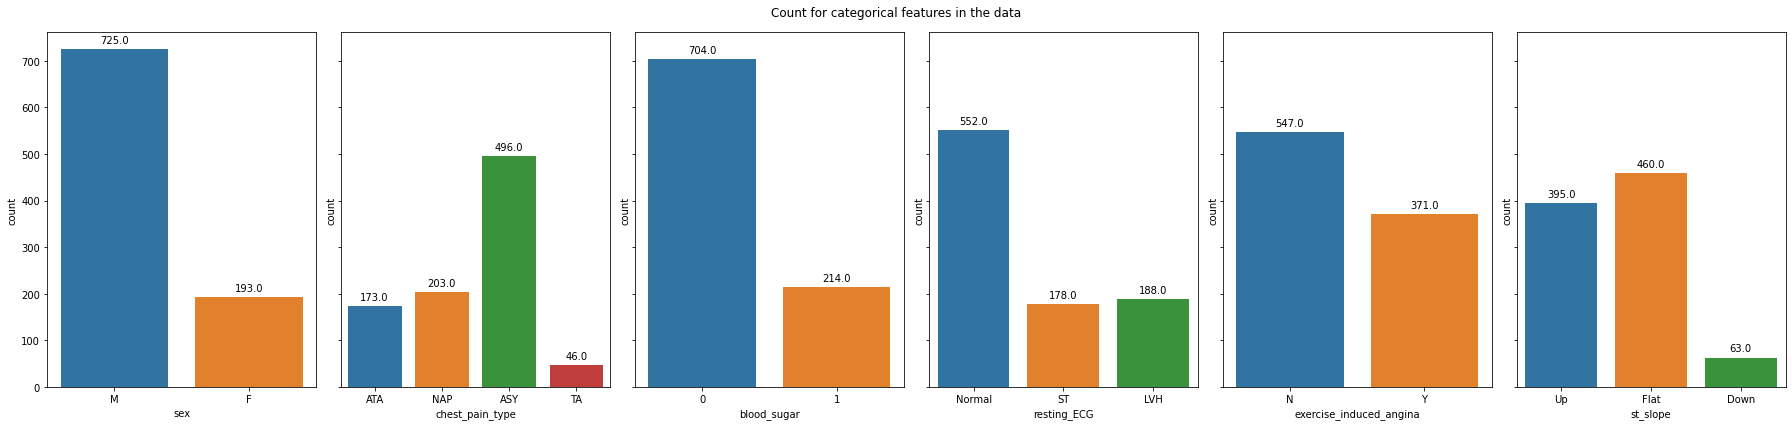

In [9]:
fig, axes = plt.subplots(1,6,figsize=(25,6),sharey=True)
for ax, col in enumerate(df[categorical_features]):
    splot = sns.countplot(x=col,data=df,ax=axes[ax])
    for p in splot.patches:
        splot.annotate(format(p.get_height(),'.1f'),(p.get_x() + p.get_width()/2,p.get_height()),ha='center', va='center',xytext=(0,9),textcoords='offset points')
plt.suptitle('Count for categorical features in the data')
plt.tight_layout()

In [10]:
df['sex'].replace({'M':'male','F':'female'}, inplace=True)

df['chest_pain_type'].replace({'ATA':'atypical angina','TA':'typical angina','NAP':'non-anginal pain','ASY':'asymptomatic'},inplace=True)

df['blood_sugar'].replace({'0':'less than 120mg/dl','1':'more than 120mg/dl'},inplace=True)

df['exercise_induced_angina'].replace({'N':'no','Y':'yes'},inplace=True)

df['heart_labels'] = df['heart_disease'].replace({0:'no heart disease',1:'heart disease'})

### Handle missing values

Text(0.5, 0.98, 'Looking for missing data')

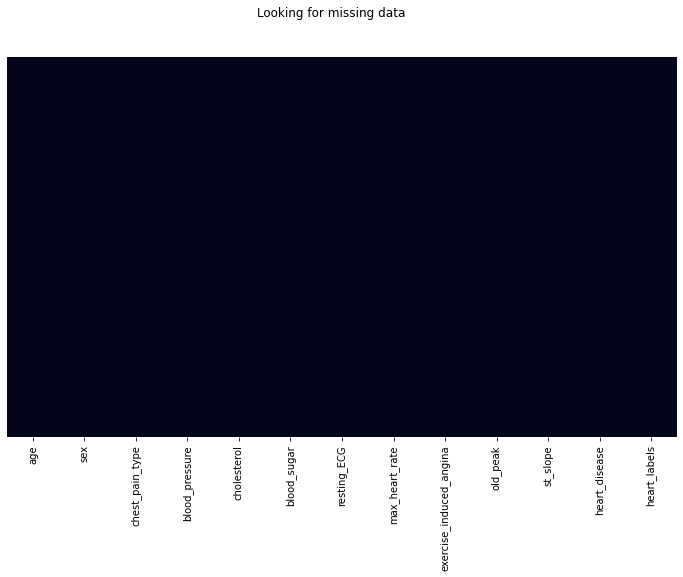

In [11]:
fig = plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
fig.suptitle('Looking for missing data')

Luckily there are no missing values so no other steps required

### Remove outliers

In [12]:
numerical_features = ['age','blood_pressure','cholesterol','max_heart_rate','old_peak']

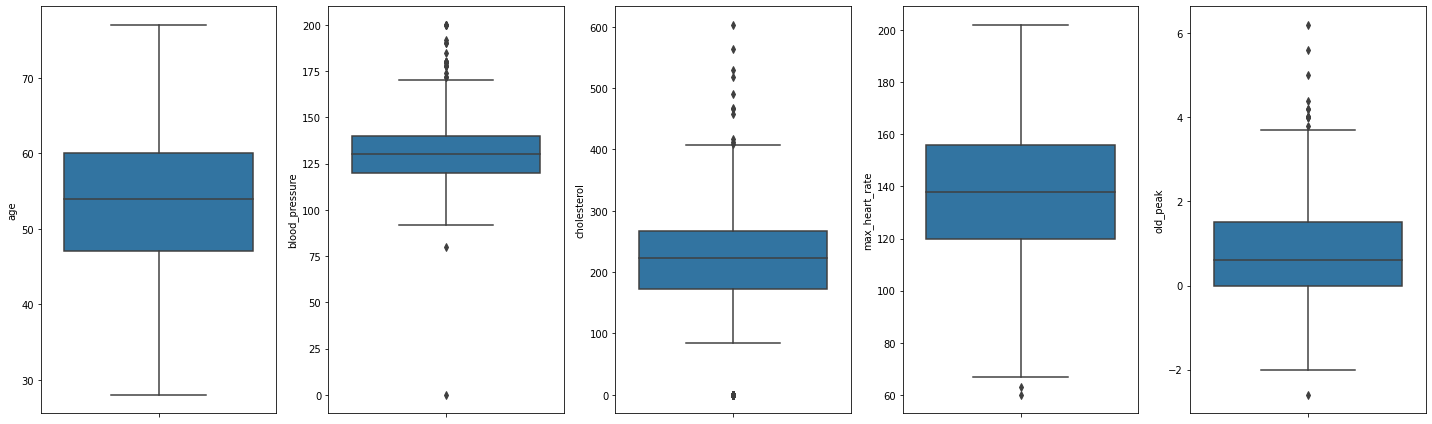

In [13]:
fig, axes = plt.subplots(1,5,figsize=(20,6))
for ax, col in enumerate(df[numerical_features]):
    sns.boxplot(y=col,data=df,orient='v',ax=axes[ax])

plt.tight_layout()

There are points outside the IQR for all columns except for age. To class any data points as outliers require research and expertise.

After doing some research, it is impossible for an individual to have 0 blood pressure and cholesterol so I will remove the rows with those values. Furthermore, an individual is very unlikely to have an old_peak of greater than 5. In addition, even though it is possible for an individual to have a cholesterol level of greater than 500mm/dl and resting blood pressure of around 200mm Hg, I will remove these values to increase the effectiveness of the model. This is because extreme values like these can increase the error variance and reduce the power of statistical tests.

In [14]:
df = df[(df['blood_pressure']>5)&(df['blood_pressure']<180)]

df = df[(df['cholesterol']>5)&(df['cholesterol']<500)]

df = df[df['old_peak']<5]

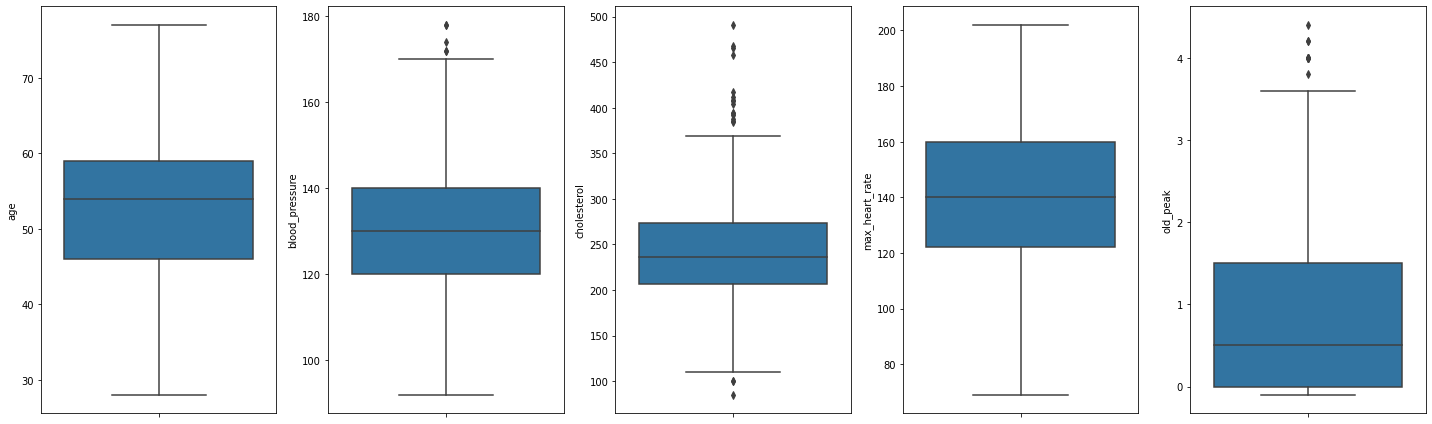

In [15]:
fig, axes = plt.subplots(1,5,figsize=(20,6))
for ax, col in enumerate(df[numerical_features]):
    sns.boxplot(y=col,data=df,orient='v',ax=axes[ax])

plt.tight_layout()

# Exploratory Data Analysis

Main purpose of EDA is to help look at the data before any modelling. It helps spot patterns and also any obvious errors within the data. It also confirms the results of the model are valid.

### Numeric Features

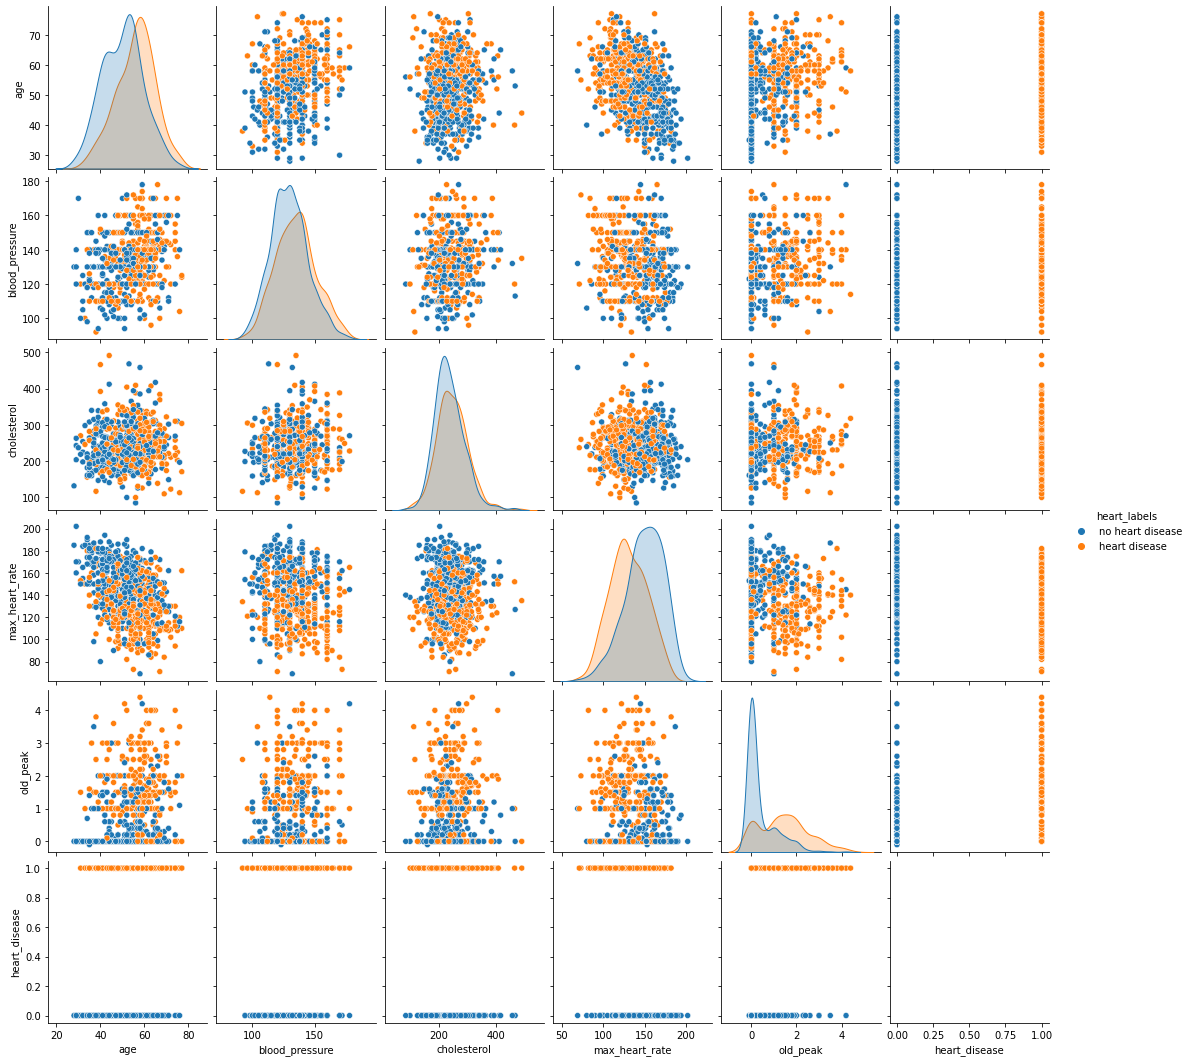

In [16]:
sns.pairplot(df.drop('blood_sugar',axis=1),hue='heart_labels')

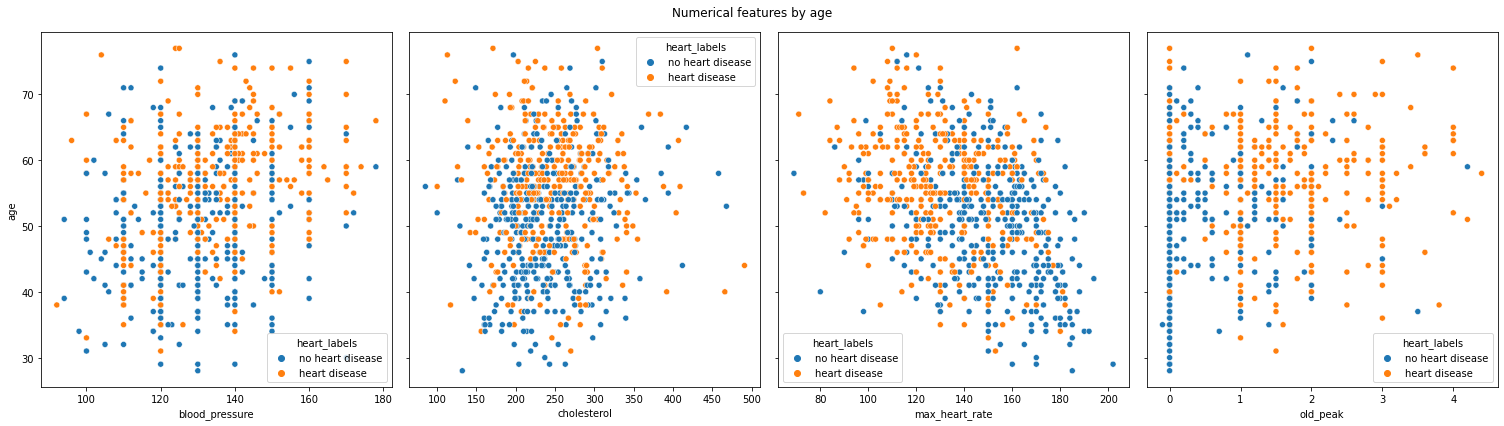

In [17]:
fig, axes = plt.subplots(1,4,figsize=(21,6),sharey=True)
for ax, col in enumerate(['blood_pressure','cholesterol','max_heart_rate','old_peak']):
    sns.scatterplot(x=col,y='age',hue='heart_labels',data=df,ax=axes[ax])

plt.suptitle('Numerical features by age')
plt.tight_layout()

### Categoric Features

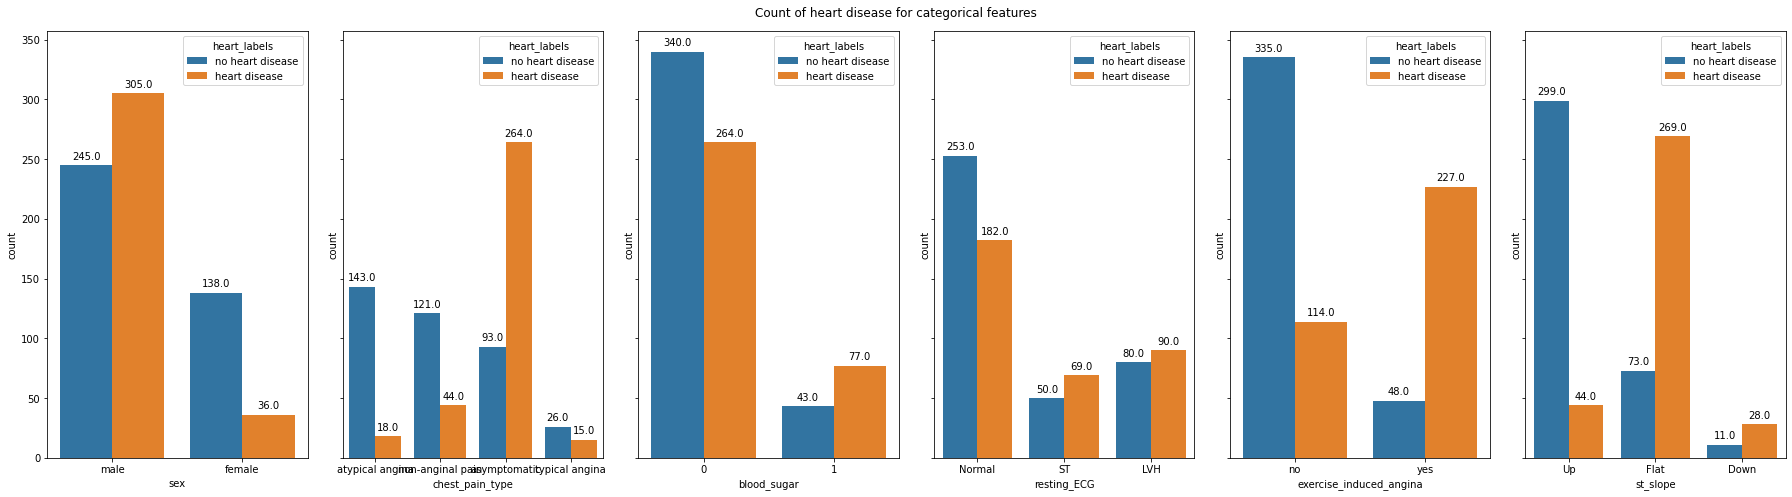

In [18]:
fig, axes = plt.subplots(1,6,figsize=(25,7),sharey=True)
for ax, col in enumerate(df[categorical_features]):
    splot = sns.countplot(x=col,data=df,hue='heart_labels',dodge=True,ax=axes[ax])
    for p in splot.patches:
        splot.annotate(format(p.get_height(),'.1f'),(p.get_x() + p.get_width()/2,p.get_height()),ha='center', va='center',xytext=(0,9),textcoords='offset points')
plt.suptitle('Count of heart disease for categorical features')
plt.tight_layout()

### Observations

- As age increases in the dataset, the likelihood of having heart disease increases
- The proportion of Men with heart disease are greater than the proportion of Women with heart disease suggesting Men are more likely to have heart disease in this sample distribution
- A flat st slope is a strong indicator of the presence of heart disease
- Asymptomatic chest pain type is a strong indicator of the presence of heart disease
- Old peak (ST value), when greater than zero, is a strong indicator of the presence of heart disease


# Training the Machine Learning Model

### Preprocessing the data
#### Transforming Categorical features to numerical
As machine learning models cannot use categorical features, I need to transform categorical data into numerical features. This is predominantly done using one-hot encoding.

In [19]:
df_enc = pd.get_dummies(df,drop_first=True)
df_enc.head()

,age,blood_pressure,cholesterol,blood_sugar,max_heart_rate,old_peak,heart_disease,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,resting_ECG_Normal,resting_ECG_ST,exercise_induced_angina_yes,st_slope_Flat,st_slope_Up,heart_labels_no heart disease
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1,1


#### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_enc.drop(['heart_labels_no heart disease','heart_disease'],axis=1)
y = df_enc['heart_disease']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=3)

#### Standardizing the data
To make the model more robust I will scale each column so that each column will have roughly the same axis. The formula used is: 'z = (x - u) / s' where ''x' is the sample and 'u' is the mean of the training samples and 's' the standard deviation of the training samples.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Logistic Regression Model
### Training the model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, make_scorer

I am first training a Logistic regression model where I am altering the class weight of the model using gridsearch. I have decided to use recall as the metric to maximise in the 3 models I have trained as we are trying to avoid as many false negatives as possible. This is because we cannot afford to turn away an individual with heart disease and classify them as healthy.

In [25]:
test_logmodel = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid={'class_weight':[{0:1,1:v} for v in range(1,20)]},
    scoring={'precision':make_scorer(precision_score), 'recall':make_scorer(recall_score),'accuracy':make_scorer(accuracy_score)},
    refit='recall')
test_logmodel.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}, {0: 1, 1: 10},
                                          {0: 1, 1: 11}, {0: 1, 1: 12},
                                          {0: 1, 1: 13}, {0: 1, 1: 14},
                                          {0: 1, 1: 15}, {0: 1, 1: 16},
                                          {0: 1, 1: 17}, {0: 1, 1: 18},
                                          {0: 1, 1: 19}]},
             refit='recall',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [26]:
log_viz = pd.DataFrame(test_logmodel.cv_results_,columns=['param_class_weight','params','mean_test_precision','mean_test_recall','mean_test_accuracy'])
log_viz['class_weight'] = log_viz['param_class_weight'].apply(lambda x: x[1])
log_viz

,param_class_weight,params,mean_test_precision,mean_test_recall,mean_test_accuracy,class_weight
0,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.846289,0.859807,0.859794,1
1,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.812708,0.912367,0.857732,2
2,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.789849,0.925411,0.847423,3
3,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.777290,0.929758,0.839175,4
4,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.754661,0.929758,0.822680,5
5,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.744154,0.942899,0.818557,6
6,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.725913,0.947343,0.804124,7
7,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.713958,0.969372,0.800000,8
8,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.709542,0.973720,0.797938,9
9,"{0: 1, 1: 10}","{'class_weight': {0: 1, 1: 10}}",0.697141,0.973720,0.785567,10


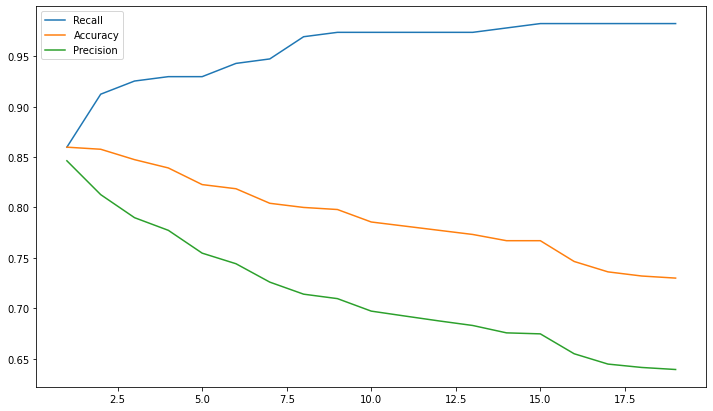

In [27]:
fig = plt.figure(figsize=(12,7))
plt.plot(log_viz['class_weight'],log_viz['mean_test_recall'],label='Recall')
plt.plot(log_viz['class_weight'],log_viz['mean_test_accuracy'],label='Accuracy')
plt.plot(log_viz['class_weight'],log_viz['mean_test_precision'],label='Precision')
plt.legend()

In [28]:
logmodel = LogisticRegression(max_iter=1000,class_weight={0:1,1:8})
logmodel.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 8}, max_iter=1000)

### Model Evaluation

In [29]:
log_predictions = logmodel.predict(X_test)

In [30]:
print(classification_report(y_test,log_predictions))
print('Confusion Matrix')
print(confusion_matrix(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.97      0.66      0.78       126
           1       0.72      0.97      0.83       113

    accuracy                           0.81       239
   macro avg       0.84      0.82      0.81       239
weighted avg       0.85      0.81      0.80       239

Confusion Matrix
[[ 83  43]
 [  3 110]]


In [31]:
log_dict = classification_report(y_test,log_predictions,output_dict=True)

## Random Forest
### Training the model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
test_rforest_model = GridSearchCV(
    RandomForestClassifier(),
    {'min_samples_leaf':[1,2,3,5,6,7,8,9,10,12,15,20]},
    scoring={'precision':make_scorer(precision_score), 'recall':make_scorer(recall_score),'accuracy':make_scorer(accuracy_score)},
    refit='recall')
test_rforest_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 3, 5, 6, 7, 8, 9, 10, 12,
                                              15, 20]},
             refit='recall',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [34]:
rforest_viz = pd.DataFrame(test_rforest_model.cv_results_,columns=['param_min_samples_leaf','params','mean_test_precision','mean_test_recall','mean_test_accuracy'])
rforest_viz

,param_min_samples_leaf,params,mean_test_precision,mean_test_recall,mean_test_accuracy
0,1,{'min_samples_leaf': 1},0.860157,0.877391,0.874227
1,2,{'min_samples_leaf': 2},0.840954,0.886087,0.865979
2,3,{'min_samples_leaf': 3},0.840056,0.886087,0.865979
3,5,{'min_samples_leaf': 5},0.839030,0.894783,0.868041
4,6,{'min_samples_leaf': 6},0.840531,0.885990,0.865979
5,7,{'min_samples_leaf': 7},0.836910,0.885990,0.863918
6,8,{'min_samples_leaf': 8},0.827594,0.890242,0.859794
7,9,{'min_samples_leaf': 9},0.837557,0.881546,0.861856
8,10,{'min_samples_leaf': 10},0.835167,0.894783,0.865979
9,12,{'min_samples_leaf': 12},0.830214,0.881546,0.857732


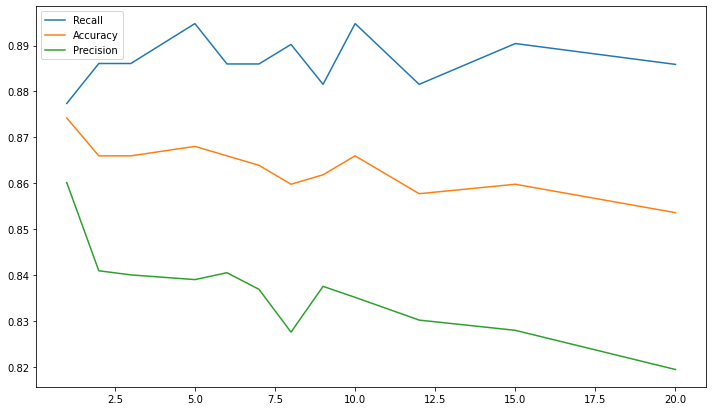

In [35]:
fig = plt.figure(figsize=(12,7))
plt.plot(rforest_viz['param_min_samples_leaf'],rforest_viz['mean_test_recall'],label='Recall')
plt.plot(rforest_viz['param_min_samples_leaf'],rforest_viz['mean_test_accuracy'],label='Accuracy')
plt.plot(rforest_viz['param_min_samples_leaf'],rforest_viz['mean_test_precision'],label='Precision')
plt.legend()

In [57]:
rforest_model = RandomForestClassifier(min_samples_leaf=5)
rforest_model.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=5)

### Model Evaluation

In [58]:
rforest_predictions = rforest_model.predict(X_test)

In [59]:
print(classification_report(y_test,rforest_predictions))
print('Confusion Matrix')
print(confusion_matrix(y_test,rforest_predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       126
           1       0.81      0.85      0.83       113

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239

Confusion Matrix
[[103  23]
 [ 17  96]]


In [60]:
rforest_dict = classification_report(y_test,rforest_predictions,output_dict=True)

## SVM

In [40]:
from sklearn.svm import SVC

### Training the model

In [61]:
test_svm_model = GridSearchCV(
    SVC(),
    param_grid={'C':[0.01],'kernel':['rbf','linear','sigmoid'],'class_weight':[{0:1,1:v} for v in range(1,15)]},
    scoring={'precision':make_scorer(precision_score), 'recall':make_scorer(recall_score),'accuracy':make_scorer(accuracy_score)},
    refit='recall'
    )
test_svm_model.fit(X_train,y_train)

/Users/danelindiongco/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danelindiongco/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danelindiongco/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danelindiongco/miniforge3/lib/python3.9/site-packages/skl

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}, {0: 1, 1: 10},
                                          {0: 1, 1: 11}, {0: 1, 1: 12},
                                          {0: 1, 1: 13}, {0: 1, 1: 14}],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             refit='recall',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [65]:
svm_viz = pd.DataFrame(test_svm_model.cv_results_,columns=['param_C','param_class_weight','param_kernel','mean_test_recall','mean_test_precision'])
svm_viz['class_weight'] = svm_viz['param_class_weight'].apply(lambda x: x[1])
svm_viz

,param_C,param_class_weight,param_kernel,mean_test_recall,mean_test_precision,class_weight
0,0.01,"{0: 1, 1: 1}",rbf,0.000000,0.000000,1
1,0.01,"{0: 1, 1: 1}",linear,0.881353,0.823123,1
2,0.01,"{0: 1, 1: 1}",sigmoid,0.750242,0.861563,1
3,0.01,"{0: 1, 1: 2}",rbf,1.000000,0.470103,2
4,0.01,"{0: 1, 1: 2}",linear,0.890145,0.798259,2
5,0.01,"{0: 1, 1: 2}",sigmoid,0.973720,0.614635,2
6,0.01,"{0: 1, 1: 3}",rbf,1.000000,0.470103,3
7,0.01,"{0: 1, 1: 3}",linear,0.921063,0.789018,3
8,0.01,"{0: 1, 1: 3}",sigmoid,1.000000,0.471091,3
9,0.01,"{0: 1, 1: 4}",rbf,1.000000,0.470103,4


In [ ]:
fig= plt.figure(figsize=(12,7))
plt.plot(svm_viz[svm_viz['param_kernel']=='rbf']['param_C'],svm_viz[svm_viz['param_kernel']=='rbf']['mean_test_recall'],label='rbf')
plt.plot(svm_viz[svm_viz['param_kernel']=='linear']['param_C'],svm_viz[svm_viz['param_kernel']=='linear']['mean_test_recall'],label='linear')
plt.plot(svm_viz[svm_viz['param_kernel']=='sigmoid']['param_C'],svm_viz[svm_viz['param_kernel']=='sigmoid']['mean_test_recall'],label='sigmoid')
plt.plot(svm_viz[svm_viz['param_kernel']=='rbf']['param_C'],svm_viz[svm_viz['param_kernel']=='rbf']['mean_test_precision'],label='rbf')
plt.plot(svm_viz[svm_viz['param_kernel']=='linear']['param_C'],svm_viz[svm_viz['param_kernel']=='linear']['mean_test_precision'],label='linear')
plt.plot(svm_viz[svm_viz['param_kernel']=='sigmoid']['param_C'],svm_viz[svm_viz['param_kernel']=='sigmoid']['mean_test_precision'],label='sigmoid')


plt.legend()

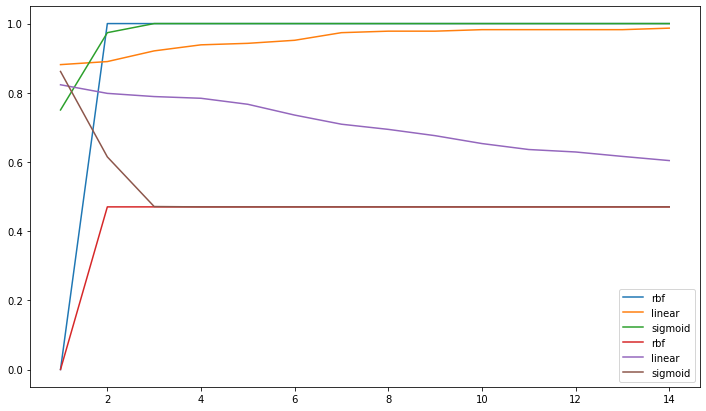

In [66]:
fig= plt.figure(figsize=(12,7))
plt.plot(svm_viz[svm_viz['param_kernel']=='rbf']['class_weight'],svm_viz[svm_viz['param_kernel']=='rbf']['mean_test_recall'],label='rbf')
plt.plot(svm_viz[svm_viz['param_kernel']=='linear']['class_weight'],svm_viz[svm_viz['param_kernel']=='linear']['mean_test_recall'],label='linear')
plt.plot(svm_viz[svm_viz['param_kernel']=='sigmoid']['class_weight'],svm_viz[svm_viz['param_kernel']=='sigmoid']['mean_test_recall'],label='sigmoid')
plt.plot(svm_viz[svm_viz['param_kernel']=='rbf']['class_weight'],svm_viz[svm_viz['param_kernel']=='rbf']['mean_test_precision'],label='rbf')
plt.plot(svm_viz[svm_viz['param_kernel']=='linear']['class_weight'],svm_viz[svm_viz['param_kernel']=='linear']['mean_test_precision'],label='linear')
plt.plot(svm_viz[svm_viz['param_kernel']=='sigmoid']['class_weight'],svm_viz[svm_viz['param_kernel']=='sigmoid']['mean_test_precision'],label='sigmoid')


plt.legend()

In [67]:
svm_model = SVC(C=0.01,kernel='linear',class_weight= {0:1,1:2})
svm_model.fit(X_train,y_train)

SVC(C=0.01, class_weight={0: 1, 1: 2}, kernel='linear')

### Evaluating the model

In [68]:
svm_predictions = svm_model.predict(X_test)

In [69]:
print(classification_report(y_test,svm_predictions))
print('Confusion Matrix')
print(confusion_matrix(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       126
           1       0.77      0.88      0.82       113

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.83      0.82      0.82       239

Confusion Matrix
[[97 29]
 [14 99]]


In [70]:
svm_dict = classification_report(y_test,svm_predictions,output_dict=True)

## Selecting the model

In [48]:
from collections import defaultdict

In [49]:
model_eval = defaultdict(list)

for dict in [log_dict,rforest_dict,svm_dict]:
    for key, value in dict.items():
        model_eval[key].append(value)

for i in model_eval['macro avg']:
    model_eval['precision'].append(i['precision'])
    model_eval['recall'].append(i['recall'])

In [50]:
model_eval_df = pd.DataFrame(model_eval,columns=['accuracy','precision','recall'],index=['Logistic Regression','Random Forest','SVM'])
model_eval_df

,accuracy,precision,recall
Logistic Regression,0.807531,0.842035,0.816091
Random Forest,0.815900,0.817825,0.818092
SVM,0.820084,0.820203,0.821148


Even though the logistic regression model has the lowest recall, I am selecting it as the model. This is on the basis that it produced the lowest false negatives on the test data. In this classification project, we are trying to minimise false negatives as much as possible as we can't afford to turn an individual with heart disease away and classify them as healthy.

([<matplotlib.axis.YTick at 0x2823a0d90>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

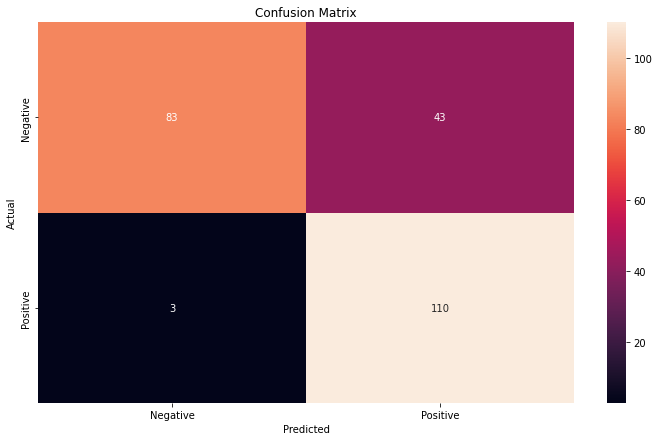

In [53]:
fig = plt.figure(figsize=(12,7))
sns.heatmap(confusion_matrix(y_test,log_predictions),annot=True,fmt='n')
plt.title('Confusion Matrix')

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.xticks([0.5,1.5],['Negative','Positive'])
plt.yticks([0.5,1.5],['Negative','Positive'])



##### Results:
- 83 - Correctly predicted positive cases
- 110 - Correctly predicted negative cases
- 43 - Incorrectly predicted negative cases (False positives - Type I error) We have a greater tolerance for false positives as next steps will only lead to wasting time but no patients are put at risk
- 3 - Incorrectly predicted positive cases (False negatives - Type II error) This is the error we want to reduce the most as individuals that have the disease are turned away

Furthermore, the model has an overall accuracy of 80%

## Model Post-Processing